In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('books-data.csv')

df.head()

,ID,Title,Category,Price [£],Rating,Availability,Quantity
0,a897fe39b1053632,A Light in the ...,Poetry,51.77,Three,In stock,22
1,90fa61229261140a,Tipping the Velvet,Historical Fiction,53.74,One,In stock,20
2,6957f44c3847a760,Soumission,Fiction,50.10,One,In stock,20
3,e00eb4fd7b871a48,Sharp Objects,Mystery,47.82,Four,In stock,20
4,4165285e1663650f,Sapiens: A Brief History ...,History,54.23,Five,In stock,20


# Preprocessing & EDA

In [3]:
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

df['Rating'] = df['Rating'].map(rating_map)

df

,ID,Title,Category,Price [£],Rating,Availability,Quantity
0,a897fe39b1053632,A Light in the ...,Poetry,51.77,3,In stock,22
1,90fa61229261140a,Tipping the Velvet,Historical Fiction,53.74,1,In stock,20
2,6957f44c3847a760,Soumission,Fiction,50.10,1,In stock,20
3,e00eb4fd7b871a48,Sharp Objects,Mystery,47.82,4,In stock,20
4,4165285e1663650f,Sapiens: A Brief History ...,History,54.23,5,In stock,20
...,...,...,...,...,...,...,...
995,cd2a2a70dd5d176d,Alice in Wonderland (Alice's ...,Classics,55.53,1,In stock,1
996,bfd5e1701c862ac3,"Ajin: Demi-Human, Volume 1 ...",Sequential Art,57.06,4,In stock,1
997,19fec36a1dfb4c16,A Spy's Devotion (The ...,Historical Fiction,16.97,5,In stock,1
998,f684a82adc49f011,1st to Die (Women's ...,Mystery,53.98,1,In stock,1


In [4]:
df['Availability'].value_counts()

Availability
In stock    1000
Name: count, dtype: int64

- All Books are Available, so will ignore the 'Availability' attribute

## - Check for Nulls and Check Data info & statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   object 
 1   Title         1000 non-null   object 
 2   Category      1000 non-null   object 
 3   Price [£]     1000 non-null   float64
 4   Rating        1000 non-null   int64  
 5   Availability  1000 non-null   object 
 6   Quantity      1000 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [6]:
df.describe()

,Price [£],Rating,Quantity
count,1000.00000,1000.000000,1000.000000
mean,35.07035,2.923000,8.585000
std,14.44669,1.434967,5.654622
min,10.00000,1.000000,1.000000
25%,22.10750,2.000000,3.000000
50%,35.98000,3.000000,7.000000
75%,47.45750,4.000000,14.000000
max,59.99000,5.000000,22.000000


## - Check for Duplicates

In [7]:
df.duplicated().sum()

0

#### - Check for books with same Title 

In [8]:
df['Title'].value_counts()

Title
Harry Potter and the ...              6
Can You Keep a ...                    2
The Star-Touched Queen                2
The Wicked + The ...                  2
Paper and Fire (The ...               1
                                     ..
Balloon Animals                       1
Art Ops Vol. 1                        1
Aristotle and Dante Discover ...      1
Angels Walking (Angels Walking ...    1
1,000 Places to See ...               1
Name: count, Length: 992, dtype: int64

In [9]:
df[df['Title'] == 'Harry Potter and the ...']

,ID,Title,Category,Price [£],Rating,Availability,Quantity
623,6c49258724f11770,Harry Potter and the ...,Default,23.32,1,In stock,5
671,ac337893a9fe0085,Harry Potter and the ...,Default,13.90,3,In stock,4
672,eff24325e0ede639,Harry Potter and the ...,Young Adult,24.17,4,In stock,4
673,5a6b7155f2797537,Harry Potter and the ...,Fantasy,31.63,4,In stock,4
674,73f4f87dd936ee5c,Harry Potter and the ...,Fantasy,48.75,5,In stock,4
675,c7c4f55b7321cba7,Harry Potter and the ...,Fantasy,14.74,1,In stock,4


- Looks like there are 6 different versions of "Harry Potter"

# Visualization

## 1. Top 25 Books (based on Rating & Quantity)

In [10]:
top_books = df.sort_values(['Rating', 'Quantity', 'Price [£]'], ascending=(False, True, False))

top_books

,ID,Title,Category,Price [£],Rating,Availability,Quantity
910,0268f149d014b389,Travels with Charley: In ...,Nonfiction,57.82,5,In stock,1
972,06f6a57a6d532844,Kitchens of the Great ...,Fiction,57.20,5,In stock,1
985,0072b94dfa30608e,Deep Under (Walker Security ...,Romance,47.09,5,In stock,1
954,3cdca3b4a93980f5,"Rat Queens, Vol. 1: ...",Sequential Art,46.96,5,In stock,1
915,6514add13c82b115,The Tumor,Nonfiction,41.56,5,In stock,1
...,...,...,...,...,...,...,...
16,feb7cc7701ecf901,Olio,Poetry,23.88,1,In stock,19
5,f77dbf2323deb740,The Requiem Red,Young Adult,22.65,1,In stock,19
20,23356462d1320d61,In Her Wake,Thriller,12.84,1,In stock,19
1,90fa61229261140a,Tipping the Velvet,Historical Fiction,53.74,1,In stock,20


In [11]:
top_books = top_books.head(25).set_index('Title')

top_books

,ID,Category,Price [£],Rating,Availability,Quantity
Title,,,,,,
Travels with Charley: In ...,0268f149d014b389,Nonfiction,57.82,5,In stock,1
Kitchens of the Great ...,06f6a57a6d532844,Fiction,57.20,5,In stock,1
Deep Under (Walker Security ...,0072b94dfa30608e,Romance,47.09,5,In stock,1
"Rat Queens, Vol. 1: ...",3cdca3b4a93980f5,Sequential Art,46.96,5,In stock,1
The Tumor,6514add13c82b115,Nonfiction,41.56,5,In stock,1
While You Were Mine,8ceb5c6aed2c5f8b,Historical Fiction,41.32,5,In stock,1
"Fruits Basket, Vol. 1 ...",72e6fbf4f6382557,Sequential Art,40.28,5,In stock,1
Ways of Seeing,66a4e422b212726a,Art,39.51,5,In stock,1
Off Sides (Off #1),b6f1cfadc4dd79d4,New Adult,39.45,5,In stock,1


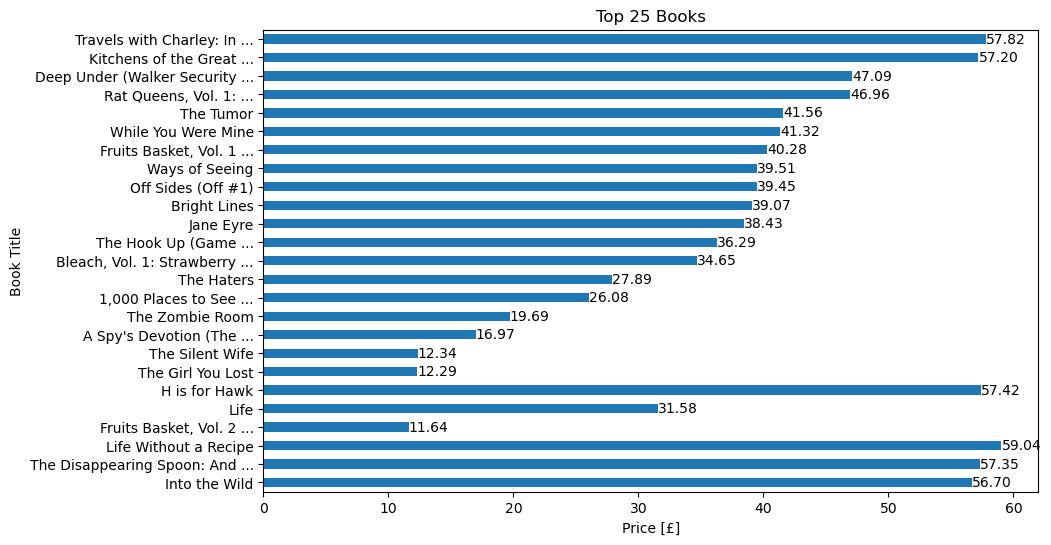

In [12]:
plt.figure(figsize=(10, 6))
top_books['Price [£]'].plot(kind='barh')
plt.title('Top 25 Books')
plt.xlabel('Price [£]')
plt.ylabel('Book Title')

plt.gca().invert_yaxis()  # Invert the y-axis to reverse the order

for index, value in enumerate(top_books['Price [£]']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

This plot displays the **Top 25 Books** sorted by a combination of factors to highlight their importance:

1. **Ratings**: Books with higher ratings are prioritized at the top.
2. **Quantity**: Among books with the same rating, those with lower stock quantities are shown first, emphasizing their limited availability.
3. **Price**: If both the rating and quantity are identical, books with higher prices are given priority.

This approach ensures that the most highly rated and sought-after books (based on availability) are emphasized, while also factoring in their price for additional context.

## 2. Books Availability Rate per Category

In [13]:
top_category = df.groupby('Category')['Quantity'].sum().sort_values().reset_index()

top_category

,Category,Quantity
0,Paranormal,1
1,Adult Fiction,3
2,Parenting,3
3,Academic,5
4,Suspense,8
5,Short Stories,8
6,Novels,9
7,Sports and Games,10
8,Erotica,15
9,Crime,15


In [14]:
total_quantity = top_category['Quantity'].sum()

total_quantity  # >>> 8585

availability_rate = round((top_category['Quantity']/total_quantity) * 100, 2)

availability_rate

0      0.01
1      0.03
2      0.03
3      0.06
4      0.09
5      0.09
6      0.10
7      0.12
8      0.17
9      0.17
10     0.17
11     0.23
12     0.38
13     0.43
14     0.50
15     0.52
16     0.57
17     0.57
18     0.61
19     0.64
20     0.64
21     0.66
22     0.69
23     0.70
24     0.80
25     0.84
26     0.96
27     0.98
28     1.04
29     1.06
30     1.22
31     1.29
32     1.39
33     1.46
34     1.55
35     1.58
36     2.11
37     2.26
38     2.67
39     2.74
40     3.13
41     3.38
42     3.72
43     4.33
44     5.40
45     6.01
46     6.85
47     7.99
48    11.36
49    15.67
Name: Quantity, dtype: float64

In [15]:
top_category['AvailabilityRate'] = availability_rate

top_category

,Category,Quantity,AvailabilityRate
0,Paranormal,1,0.01
1,Adult Fiction,3,0.03
2,Parenting,3,0.03
3,Academic,5,0.06
4,Suspense,8,0.09
5,Short Stories,8,0.09
6,Novels,9,0.10
7,Sports and Games,10,0.12
8,Erotica,15,0.17
9,Crime,15,0.17


In [16]:
top_category = top_category.set_index('Category')

top_category

,Quantity,AvailabilityRate
Category,,
Paranormal,1,0.01
Adult Fiction,3,0.03
Parenting,3,0.03
Academic,5,0.06
Suspense,8,0.09
Short Stories,8,0.09
Novels,9,0.10
Sports and Games,10,0.12
Erotica,15,0.17


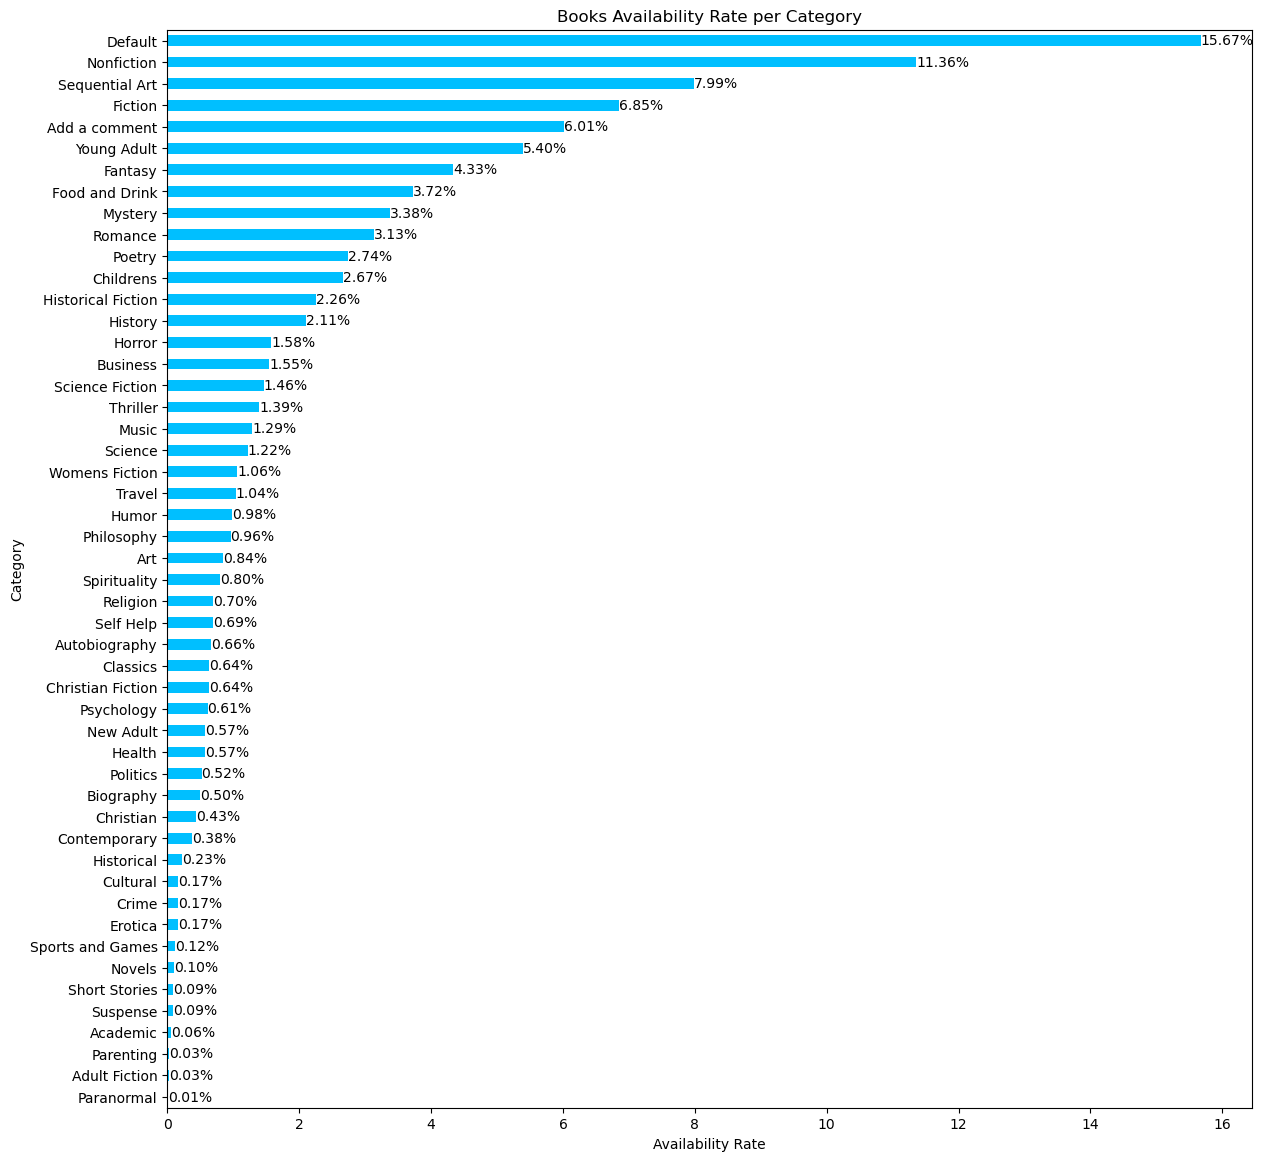

In [17]:
top_category['AvailabilityRate'].plot(kind='barh', figsize=(14, 14), color='deepskyblue')

plt.title('Books Availability Rate per Category')
plt.xlabel('Availability Rate')
plt.ylabel('Category')

for index, value in enumerate(top_category['AvailabilityRate']):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()

This horizontal bar chart shows the percentage of available books in each category compared to the total books across all categories.
- The **longer** the bar, the **higher** the share of books in that category relative to others.

### 2.5- 10 Best Selling Categories (assuming fewer quantities suggest higher sales)

In [18]:
top_10_category = top_category.head(10)

top_10_category

,Quantity,AvailabilityRate
Category,,
Paranormal,1,0.01
Adult Fiction,3,0.03
Parenting,3,0.03
Academic,5,0.06
Suspense,8,0.09
Short Stories,8,0.09
Novels,9,0.10
Sports and Games,10,0.12
Erotica,15,0.17


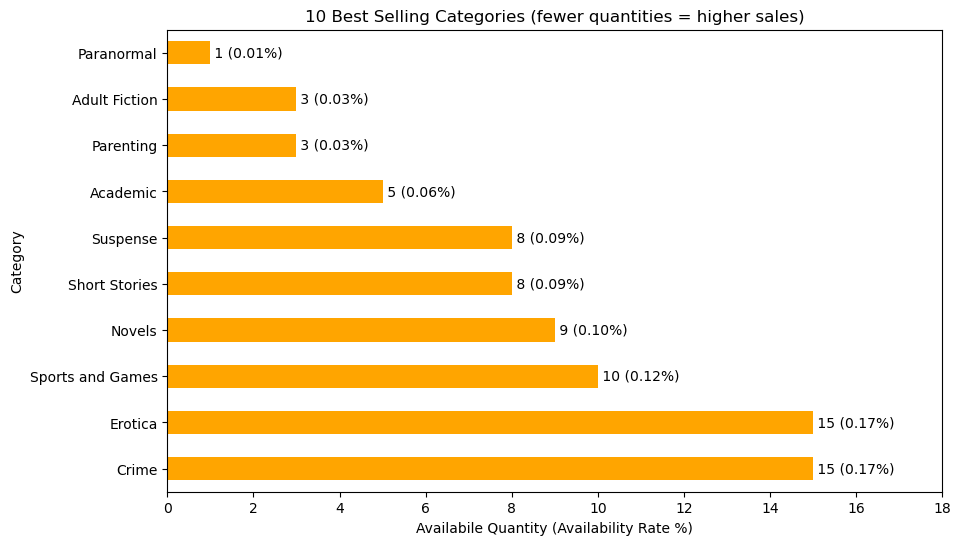

In [19]:
top_10_category['Quantity'].plot(kind='barh', figsize=(10, 6), color='orange')

plt.title('10 Best Selling Categories (fewer quantities = higher sales)')
plt.xlabel('Availabile Quantity (Availability Rate %)')
plt.ylabel('Category')

# Loop to add the text (quantity and rate) at the end of each bar
for index, value in enumerate(top_10_category['Quantity']):
    rate = top_10_category['AvailabilityRate'].iloc[index]  # Get the rate from 'AvailabilityRate'
    plt.text(value, index, f' {value} ({rate:.2f}%)', va='center')  # Add the text with value and rate

plt.gca().invert_yaxis()

plt.xlim(0, 18)  # to increase the x-axis range, because the text goes outside the chart

plt.show()

#### Categories with **fewer** available books are considered to have sold **better**, as the stock is running low.

## 3. Relationship Between Rating & Price / Average Price per Rating

Grouping the data/ Aggregate by "Rating" (calculating the average/mean "Price" for each "Rating" category/ group)

In [20]:
rating_prices = df.groupby('Rating')['Price [£]'].mean().reset_index()
rating_prices

,Rating,Price [£]
0,1,34.561195
1,2,34.810918
2,3,34.692020
3,4,36.093296
4,5,35.374490


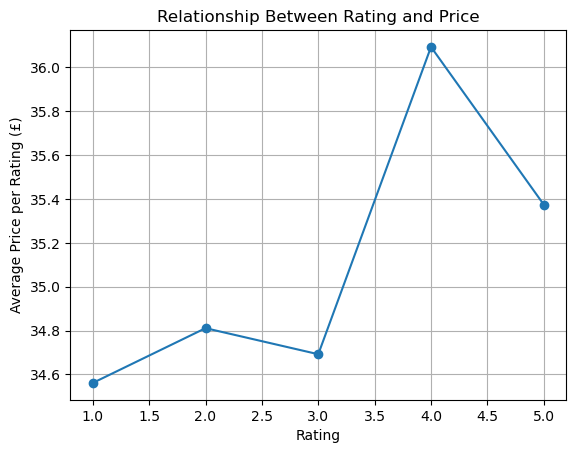

In [21]:
plt.plot(rating_prices['Rating'], rating_prices['Price [£]'], marker='o')
plt.title('Relationship Between Rating and Price')
plt.xlabel('Rating')
plt.ylabel('Average Price per Rating (£)')
plt.grid()
plt.show()

The plot shows how the **average price** of books changes depending on their **rating**. Each point on the line indicates the average price for books with a specific rating.

- Books with the lowest ratings (1 and 2) have the lowest average prices, around £34.6 to £34.8.
- For books rated 4, the average price increases significantly, reaching a peak of about £36.
- Books with the highest rating (5) see a decline in price, averaging just above £35.

This trend suggests that higher-rated books (up to 4 stars) tend to have higher average prices, but books rated 5 stars are slightly cheaper.

## 4. Average Price per Category

In [22]:
categories_prices = df.groupby('Category')['Price [£]'].mean().reset_index()
categories_prices

,Category,Price [£]
0,Academic,13.120000
1,Add a comment,35.796418
2,Adult Fiction,15.360000
3,Art,38.520000
4,Autobiography,37.053333
5,Biography,33.662000
6,Business,32.460000
7,Childrens,32.638276
8,Christian,42.496667
9,Christian Fiction,34.385000


In [23]:
categories_prices = categories_prices.set_index('Category')
categories_prices

,Price [£]
Category,
Academic,13.120000
Add a comment,35.796418
Adult Fiction,15.360000
Art,38.520000
Autobiography,37.053333
Biography,33.662000
Business,32.460000
Childrens,32.638276
Christian,42.496667


In [24]:
categories_prices = categories_prices.sort_values('Price [£]', ascending=False)
categories_prices

,Price [£]
Category,
Suspense,58.330000
Novels,54.810000
Politics,53.613333
Health,51.452500
New Adult,46.383333
Christian,42.496667
Sports and Games,41.166000
Self Help,40.620000
Travel,39.794545


In [25]:
import squarify

In [26]:
import matplotlib.cm as cm

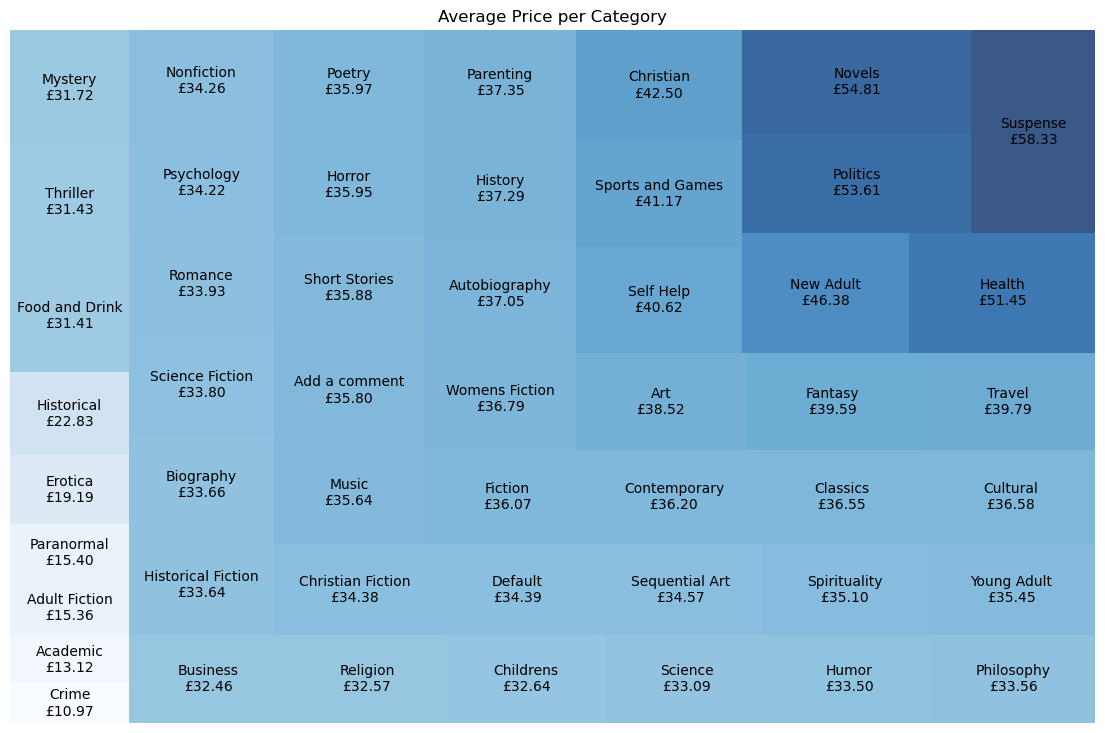

In [27]:
plt.figure(figsize=(14, 9))

# Normalize the prices to map to a color range
norm = plt.Normalize(categories_prices['Price [£]'].min(), categories_prices['Price [£]'].max())
colors = [cm.Blues(norm(value)) for value in categories_prices['Price [£]']]

# To display the Prices along with the Category Name (index)
labels = [f"{category}\n£{price:.2f}" for category, price in zip(categories_prices.index, categories_prices['Price [£]'])]

# Reverse the order of sizes to be from Top to Bottom
sizes = categories_prices['Price [£]'].values[::-1]
labels = labels[::-1]
colors = colors[::-1]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

plt.title('Average Price per Category')
plt.axis('off')  # Remove the default axis
plt.show()

## 5. What is the Categories with the Highest Ratings

In [28]:
categories_rating = df.groupby('Category')['Rating'].mean().sort_values().reset_index().tail(5)
categories_rating

,Category,Rating
45,Health,3.750000
46,Christian Fiction,4.166667
47,Novels,5.000000
48,Erotica,5.000000
49,Adult Fiction,5.000000


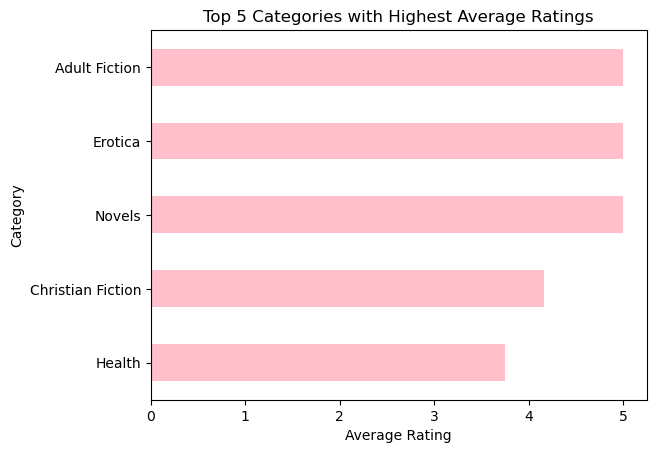

In [29]:
categories_rating.plot(kind='barh', x='Category', y='Rating', legend=False, color='pink')
plt.title('Top 5 Categories with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()